<a href="https://colab.research.google.com/github/Hellennjerik/-AI-Coursework-2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
upload = files.upload ()

Saving diamonds.csv to diamonds (1).csv


In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('diamonds.csv')
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
#data cleaning
#checking for duplicates
df.duplicated().sum()


# check  for missing values
df.isnull().sum()
# check the dataset info
df.info()
# drop irrelevant column
df.drop('Unnamed: 0', axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


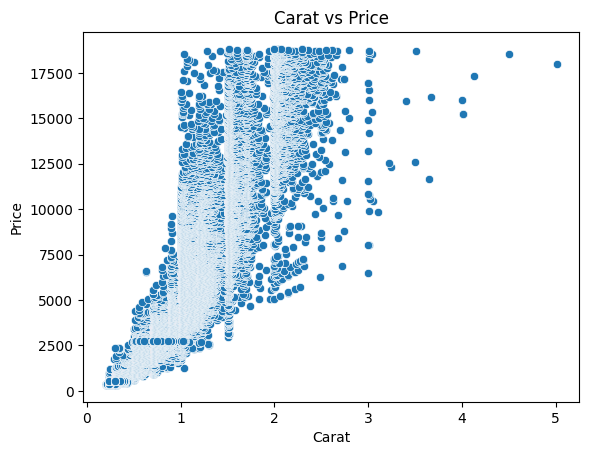

In [27]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# a summary of the dataset
df.describe()

# A visualization of the carat vs price
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()





1. The summary shows that diamond prices vary the higher the carat values the higher the prices.  
2. The scatter plot indicates the relationship between carat and price — as the carat increases, the price tends to rise.  


In [28]:
#creating a sample for modelling

#create a sample of randomly selected 12500 records for modelling and set it in a
#dataframe named ‘diamonds_model’

diamonds_model = df.sample(n=12500, random_state=42)

diamonds_model.shape

(12500, 10)

In [29]:
#Use the linear regression algorithm to determine the price of diamonds given all other features of carats, cut, colour etc. Include a suitable technique for verifying the accuracy of the developed model. Apply a suitable feature engineering technique for all categorical variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# pd.get_dummies () - turns the categorical variables into numbers so that regression can work on them
diamonds_encoded = pd.get_dummies(diamonds_model, columns=['cut', 'color', 'clarity'])

# Split the data into training and testing sets
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 1218154.3069646754
R-squared: 0.9231955008559884


In [30]:
#Apply Principal Component Analysis (PCA) to select the 2 most suitable features
#among all continuous variables that have a strong correlation to the prices feature.
#Model this relationship using the linear regression algorithm and verify its accuracy.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#select the continous variables
continuous_vars = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = diamonds_model[continuous_vars]
y = diamonds_model['price']

#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#apply PCA to get 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#create a Dataframe for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

#combining PCA results with the price
pca_df['price'] = y.values

#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(pca_df[['PC1', 'PC2']], pca_df['price'], test_size=0.2, random_state=42)

#Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set
#R2 and RMSE they are used to evaluate the model accuracy
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred))

print('R-squared:', r2)
print('RMSE:', rmse_pca)




R-squared: 0.8055772996058582
RMSE: 1756.027477562555


Principal Component Analysis was applied to the six continuous diamond attributes (carat, depth, table, x, y, z).
The first two principal components captured most of the variance related to diamond prices.
Using these components in a linear regression model yielded an R² score of 0.806 and an RMSE of 1756.03, indicating that the two PCA features effectively summarize the main factors influencing diamond pricing.
This shows that PCA can reduce complexity while still retaining the predictive power of the data.

In [31]:
#To the model developed in question 3, fit 2 different regression models using Lasso
#and Ridge regularisation techniques and validate accuracies for both models.

#Using Lasso and Ridge regression to compare accuracies

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

#Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

#Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

#compare results
print('Lasso R-squared:', r2_lasso)
print('Lasso RMSE:', rmse_lasso)

print('Ridge R-squared:', r2_ridge)
print('Ridge RMSE:', rmse_ridge)

Lasso R-squared: 0.8055790992068196
Lasso RMSE: 1756.0193505381822
Ridge R-squared: 0.8055771442301162
Ridge RMSE: 1756.0281792399242


Lasso and Ridge regression models were fitted to the PCA-transformed dataset.
Both models achieved an R² score of approximately 0.806 and an RMSE of around 1756, which are nearly identical to the performance of the simple linear regression model.
This indicates that regularization did not  alter the model’s predictive power as much but helped ensure more stable coefficient estimates

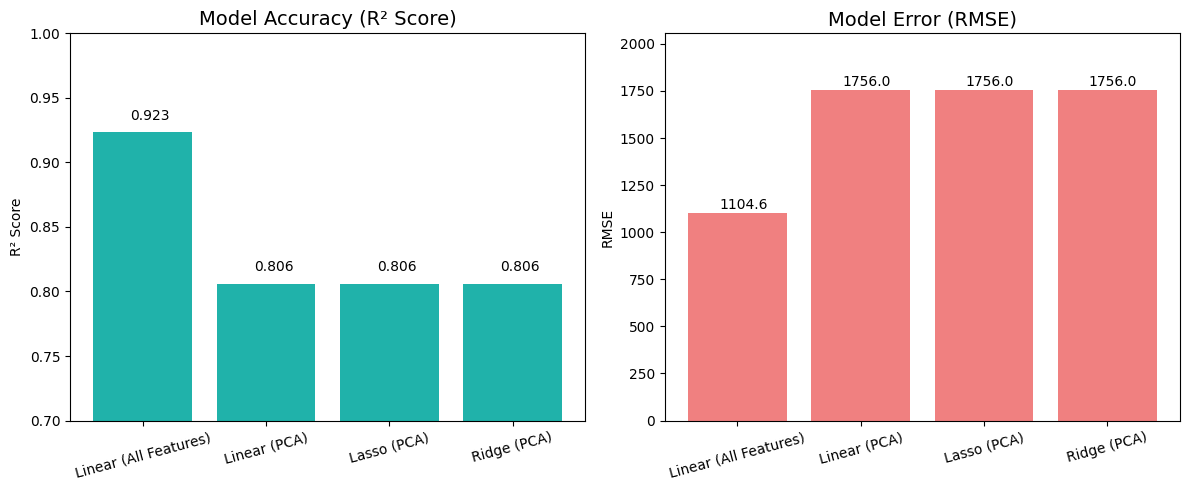

In [32]:
import matplotlib.pyplot as plt

# Values from the above results
r2_linear_full = 0.9232
r2_linear_pca = 0.8056
r2_lasso = 0.8056
r2_ridge = 0.8056

rmse_linear_full = 1104.6
rmse_linear_pca = 1756.0
rmse_lasso = 1756.0
rmse_ridge = 1756.0

# Data for plotting
models = ['Linear (All Features)', 'Linear (PCA)', 'Lasso (PCA)', 'Ridge (PCA)']
r2_scores = [r2_linear_full, r2_linear_pca, r2_lasso, r2_ridge]
rmse_scores = [rmse_linear_full, rmse_linear_pca, rmse_lasso, rmse_ridge]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- R² Plot ---
bars1 = axes[0].bar(models, r2_scores, color='lightseagreen')
axes[0].set_title('Model Accuracy (R² Score)', fontsize=14)
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0.7, 1.0)
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=15)
for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width()/2 - 0.1,
                 bar.get_height() + 0.01,
                 f"{bar.get_height():.3f}",
                 color='black', fontsize=10)

# --- RMSE Plot ---
bars2 = axes[1].bar(models, rmse_scores, color='lightcoral')
axes[1].set_title('Model Error (RMSE)', fontsize=14)
axes[1].set_ylabel('RMSE')
axes[1].set_ylim(0, max(rmse_scores) + 300)
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=15)
for bar in bars2:
    axes[1].text(bar.get_x() + bar.get_width()/2 - 0.15,
                 bar.get_height() + 20,
                 f"{bar.get_height():.1f}",
                 color='black', fontsize=10)

plt.tight_layout()
plt.show()


The Linear regression model using all features achived the highest accuracy and lowest RMSE to mean it predicted diamond prices most effectively.
The PCA ,Lasso, and Ridge models had a slightly lower accuracy because PCA removed some key predictive details from the data set
